In [150]:
#import
import keras
import numpy as np
from mnist import MNIST
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import Adadelta
import tensorflow as tf
import sys

In [151]:
print(tf.__version__)

1.14.0


In [152]:
num_classes = 10
img_rows, img_cols = 28, 28
num_classes = 10
epochs = 10
batch_size = 128
input_shape = (img_rows, img_cols, 1)

In [157]:
#Load the data
mndata = MNIST('mnist')

train_imgs, train_lbls = mndata.load_training()
test_imgs, test_lbls = mndata.load_testing()

#Convert the data into np.ndarray data (for keras)
train_images = np.asarray(train_img)
train_labels = np.asarray(train_lbls)

test_images = np.asarray(test_imgs)
test_labels = np.asarray(test_lbls)

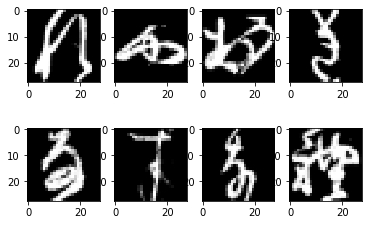

In [158]:
#Some data
from matplotlib import pyplot
train_images.shape = (60000, 28, 28)
for i in range(0, 8):
    pyplot.subplot(241 + i)
    pyplot.imshow(train_images[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [159]:
#We need shape (60000, 28, 28, 1)
#60 000 images, size -> 28x28,only greyscale so 1
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 784)


In [160]:
#Reshape of the data
train_images.shape = (60000, img_rows, img_cols, 1)
test_images.shape = (10000, img_rows, img_cols, 1)

train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [161]:
#Value of color between 0 and 1
train_images = train_images/255
test_images = test_images/255

In [162]:
#We have:
print(train_images.shape[0], "train sample")
print(test_images.shape[0], "test sample")
print("Number of classes :", num_classes)

60000 train sample
10000 test sample
Number of classes : 10


In [38]:
#Convolutional neural network CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [39]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adadelta',
              metrics=['accuracy'])

In [40]:
#10 epochs can be too much, but here we don't have underfitting of overfitting problem
model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.4554 - acc: 0.8573 - val_loss: 0.3553 - val_acc: 0.8939
Epoch 2/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1787 - acc: 0.9467 - val_loss: 0.2771 - val_acc: 0.9202
Epoch 3/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1290 - acc: 0.9608 - val_loss: 0.2428 - val_acc: 0.9321
Epoch 4/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1050 - acc: 0.9682 - val_loss: 0.2326 - val_acc: 0.9374
Epoch 5/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0907 - acc: 0.9721 - val_loss: 0.2174 - val_acc: 0.9419
Epoch 6/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0787 - acc: 0.9762 - val_loss: 0.1897 - val_acc: 0.9469
Epoch 7/10
60000/60000 [==========

In [163]:
#Evaluate the loss and accuracy of the model
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save("model.h5")

Test loss: 0.21796714902445674
Test accuracy: 0.9491


In [171]:
#Reshape for the prediction because the shape is changed when we print
test_images.shape = (10000, img_rows, img_cols, 1)

#Prediction
print(model.predict([test_images[15:16]]).argmax(axis=1))

[5]


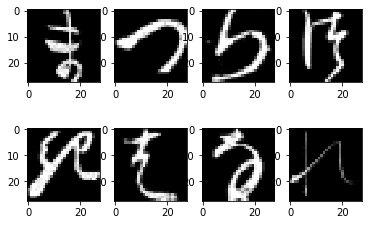

In [168]:
from matplotlib import pyplot
test_images.shape = (10000, 28, 28)
for i in range(0, 8):
    pyplot.subplot(241 + i)
    pyplot.imshow(test_images[i+10], cmap=pyplot.get_cmap('gray'))
pyplot.show()